In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, confusion_matrix


In [9]:
# Load the dataset
avocado_data = pd.read_csv("https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/raw/master/avocado.csv")

# Displaying first few rows of the dataset
print(avocado_data.tail())

       Unnamed: 0 Date  AveragePrice  Total Volume  4046  4225  4770  \
16463         NaN  NaN           NaN           NaN   NaN   NaN   NaN   
16464         NaN  NaN           NaN           NaN   NaN   NaN   NaN   
16465         NaN  NaN           NaN           NaN   NaN   NaN   NaN   
16466         NaN  NaN           NaN           NaN   NaN   NaN   NaN   
16467         NaN  NaN           NaN           NaN   NaN   NaN   NaN   

       Total Bags  Small Bags  Large Bags  XLarge Bags type  year region  
16463         NaN         NaN         NaN          NaN  NaN   NaN    NaN  
16464         NaN         NaN         NaN          NaN  NaN   NaN    NaN  
16465         NaN         NaN         NaN          NaN  NaN   NaN    NaN  
16466         NaN         NaN         NaN          NaN  NaN   NaN    NaN  
16467         NaN         NaN         NaN          NaN  NaN   NaN    NaN  


#  Explotary Data Analysis

In [4]:
# Descriptive statistics
print(avocado_data.describe())

        Unnamed: 0  AveragePrice  Total Volume          4046          4225  \
count  1517.000000   1517.000000  1.517000e+03  1.517000e+03  1.517000e+03   
mean     26.995386      1.074990  1.601879e+06  6.464387e+05  6.114375e+05   
std      14.848287      0.188891  4.433143e+06  1.947614e+06  1.672906e+06   
min       0.000000      0.490000  3.875074e+04  4.677200e+02  1.783770e+03   
25%      14.000000      0.980000  1.474700e+05  2.040034e+04  4.147606e+04   
50%      29.000000      1.080000  4.027919e+05  8.175117e+04  1.186649e+05   
75%      39.000000      1.190000  9.819751e+05  3.775785e+05  4.851503e+05   
max      51.000000      1.680000  4.465546e+07  1.893304e+07  1.895648e+07   

               4770    Total Bags    Small Bags    Large Bags    XLarge Bags  \
count  1.517000e+03  1.517000e+03  1.517000e+03  1.517000e+03    1517.000000   
mean   5.040550e+04  2.935974e+05  2.487736e+05  4.264205e+04    2181.771074   
std    1.377812e+05  7.579765e+05  6.474765e+05  1.182157

In [5]:

# Checking for missing values
print(avocado_data.isnull().sum()) #no missing values

Unnamed: 0      14951
Date            14951
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64


In [13]:
from sklearn.impute import SimpleImputer


# Define columns to impute
numerical_columns = ['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']
categorical_columns = ['type', 'year', 'region']

# Impute missing values with mean for numerical columns
numerical_imputer = SimpleImputer(strategy='mean')
avocado_data[numerical_columns] = numerical_imputer.fit_transform(avocado_data[numerical_columns])

# Impute missing values with most frequent value for categorical columns
categorical_imputer = SimpleImputer(strategy='most_frequent')
avocado_data[categorical_columns] = categorical_imputer.fit_transform(avocado_data[categorical_columns])


# Impute missing values in Date column with 'Unknown'
avocado_data['Date'].fillna('Unknown', inplace=True)

# Check if missing values have been imputed
print(avocado_data.isnull().sum())

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64


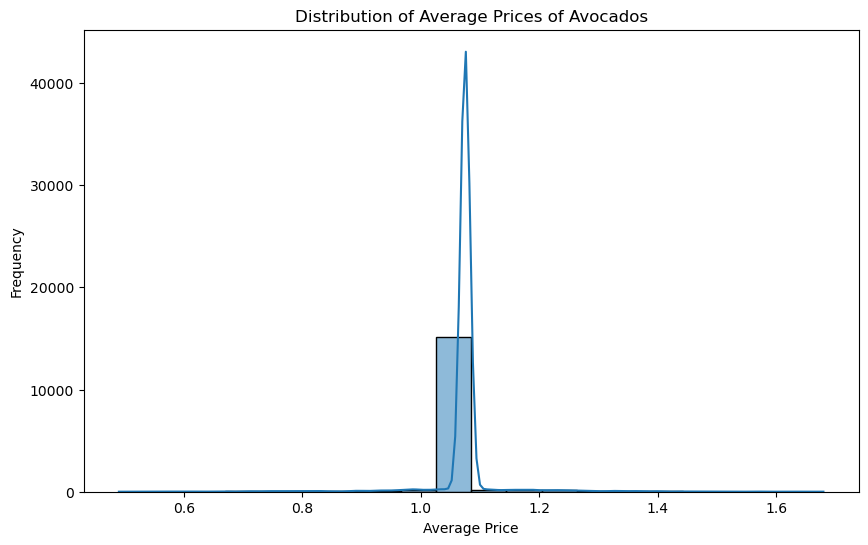

In [19]:
 #Visualize the distribution of average prices using histograms or box plots
plt.figure(figsize=(10, 6))
sns.histplot(avocado_data['AveragePrice'], bins=20, kde=True)
plt.title('Distribution of Average Prices of Avocados')
plt.xlabel('Average Price')
plt.ylabel('Frequency')
plt.show()


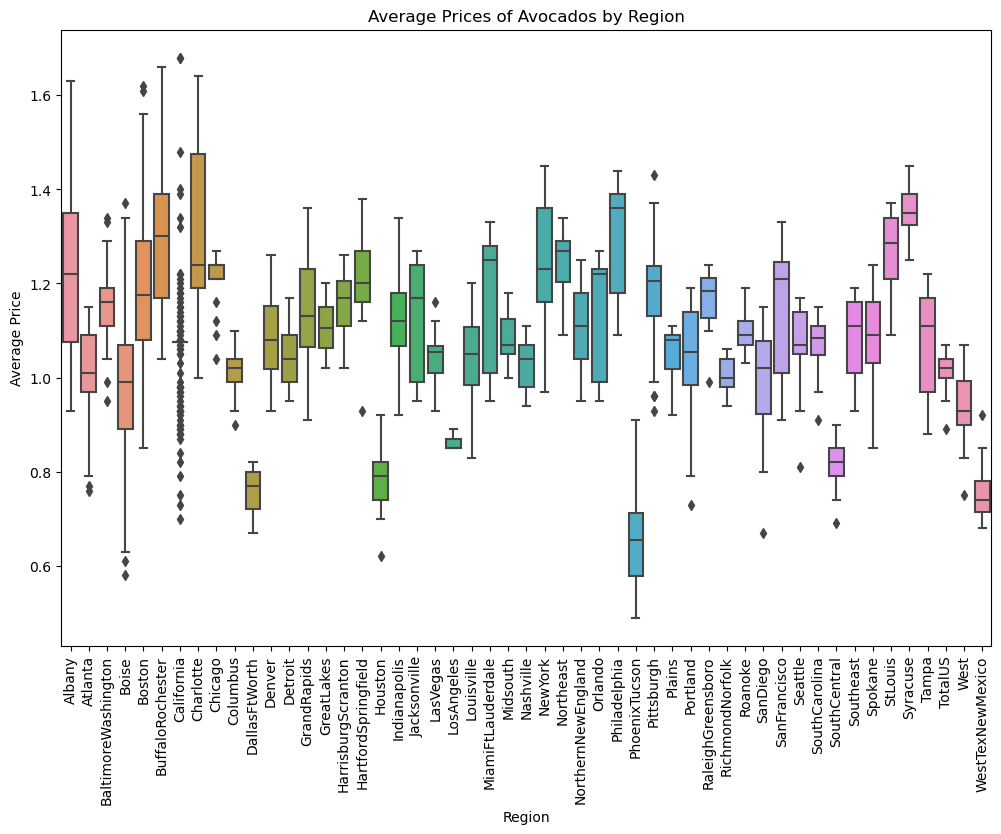

In [22]:
# Step 4: Identify regions with higher/lower average prices
# Box plot of average prices by region
plt.figure(figsize=(12, 8))
sns.boxplot(x='region', y='AveragePrice', data=avocado_data)
plt.title('Average Prices of Avocados by Region')
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.show()

# Classification Task: Predicting Region - Random Forest Classifier

In [15]:
# Splitting the data into features (X) and target (y) for classification
X_classification = avocado_data.drop(['Date', 'type', 'year', 'AveragePrice', 'region'], axis=1)
y_classification = avocado_data['region']

# Splitting the data into training and testing sets for classification
X_train_classification, X_test_classification, y_train_classification, y_test_classification = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)


In [16]:
# Handling missing values by imputation
from sklearn.impute import SimpleImputer

# Train Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_classification, y_train_classification)

# Predictions for classification
y_pred_classification = rf_classifier.predict(X_test_classification)


In [17]:
# Predictions for classification
y_pred_classification = rf_classifier.predict(X_test_classification)

In [18]:
# Classification Evaluation
accuracy_classification = accuracy_score(y_test_classification, y_pred_classification)
print("Accuracy for Region Classification:", accuracy_classification)
print("Classification Report:")
print(classification_report(y_test_classification, y_pred_classification))
print("Confusion Matrix:")
print(confusion_matrix(y_test_classification, y_pred_classification))

Accuracy for Region Classification: 0.9948391013964785
Classification Report:
                     precision    recall  f1-score   support

             Albany       0.93      0.93      0.93        15
            Atlanta       0.90      0.90      0.90        10
BaltimoreWashington       0.93      1.00      0.96        13
              Boise       1.00      0.80      0.89        10
             Boston       1.00      0.87      0.93        15
   BuffaloRochester       0.88      0.88      0.88         8
         California       1.00      1.00      1.00      3020
          Charlotte       0.83      1.00      0.91         5
           Columbus       1.00      0.93      0.97        15
      DallasFtWorth       1.00      0.67      0.80         3
             Denver       1.00      1.00      1.00         7
            Detroit       1.00      1.00      1.00         9
        GrandRapids       1.00      0.88      0.93         8
         GreatLakes       1.00      1.00      1.00         7
 Harri

# Overall Report 

This classification report provides a detailed evaluation of the Random Forest Classifier's performance in predicting avocado regions. Let's break down the key metrics and the confusion matrix:

Precision, Recall, and F1-score:
- Precision: The precision for each class measures the proportion of true positive predictions among all positive predictions. It indicates how many of the predicted positive cases are actually positive.
- Recall: The recall for each class measures the proportion of true positive predictions among all actual positive cases. It indicates how many of the actual positive cases were correctly identified by the classifier.
- F1-score: The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall, and it's particularly useful when there's an imbalance between classes.

Support:
- Support: The support for each class represents the number of instances of each class in the dataset.

Accuracy:
- Accuracy: Overall accuracy measures the proportion of correctly classified instances among all instances. It indicates how well the classifier performs across all classes.

Confusion Matrix:
- The confusion matrix provides a summary of the classifier's performance by showing the number of true positive, false positive, true negative, and false negative predictions for each class.
- Each row in the confusion matrix corresponds to the actual class, while each column corresponds to the predicted class.

Interpretation:
- The Random Forest Classifier achieved an overall accuracy of approximately 99.48%, indicating that it correctly classified the majority of instances across all classes.
- The precision, recall, and F1-score are high for most classes, suggesting that the classifier performed well in predicting the avocado regions.
- However, some classes have lower precision, recall, and F1-score, which may indicate difficulties in distinguishing those classes from others.
- The confusion matrix provides a detailed breakdown of the classifier's performance for each class, showing the number of correct and incorrect predictions.

In summary, the Random Forest Classifier demonstrated high accuracy and effective performance in predicting avocado regions based on the provided features. However, further analysis may be needed to address any discrepancies or challenges observed in specific classes.